In [1]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sys
sys.path.append('../Codes/')
from models import *
from Epi_models import*
from functions import *
import networkx as nx
import matplotlib.animation as animation
import seaborn
from matplotlib.lines import Line2D
import pickle

def node_degrees(Amat):
        return Amat.sum(axis=0).reshape(N,1)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker

Text_files_path = '../../../../Dropbox/Research/Epidemiology_2020/Text_files/'

%autosave 60

Autosaving every 60 seconds


## The Network
The network is generated usign the barabasi-albert algorithm. It has a heavy-tailed degree distribution characterized by a power-law behaviour and a exponential cutoff.

In [2]:
#----Load data network of contacts----
N = 2000
infile_k = open(Text_files_path+'Stochastic/Networks/barabasi-albert/k.pck','rb')
k = pickle.load(infile_k)
infile_k.close()
infile_p_k = open(Text_files_path+'Stochastic/Networks/barabasi-albert/p_k.pck','rb')
p_k = pickle.load(infile_p_k)
infile_p_k.close()

meanDegree = np.sum(k*p_k)
meanDegree2 = np.sum(k**2*p_k)
print(meanDegree)
print(np.max(k))

3.9960271618768215
265


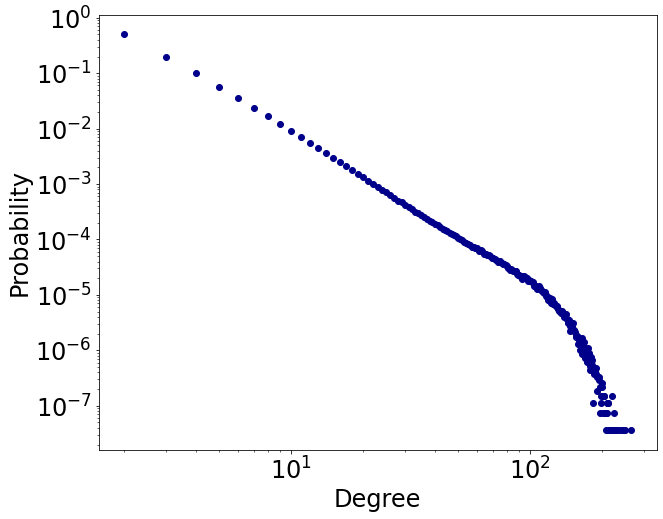

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(k[1:], p_k[1:], 'o', color = 'darkblue')
my_plot_layout(ax=ax, xlabel='Degree', ylabel='Probability', xscale = 'log', yscale = 'log')
#fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/degree_distribution.png')

In [4]:
colors_R = plt.cm.Paired(range(8))
N = 2000
print('N:', N)
gamma = 1/6
print('Gamma:', gamma)
sigma = 1000
print('Sigma:', sigma)
# I defined the R0 values for the SIR model and then get the values of beta
R0s = np.array([4.5, 3.0, 2.0, 1.2, 0.8]) #for p=1.0 I don't take into account R0=0.8
betas = R0s*gamma
print('betas:', betas)
R0_es = np.sqrt(1-4*((sigma*gamma-sigma*betas)/(sigma+gamma)**2))
Ts = 1-((meanDegree)/(meanDegree+R0s))
T_c = (meanDegree)/(meanDegree2-meanDegree)
R0_ns = Ts/T_c
print('T_c:', T_c)
print('Ts:', Ts)
print('R0s:', R0s)
print('R0_es:', R0_es)
print('R0_ns:', R0_ns)
tau = 1/gamma
tau_e = 2*(gamma+sigma)**(-1)
print('tau:', tau)
print('tau_e:', tau_e)

N: 2000
Gamma: 0.16666666666666666
Sigma: 1000
betas: [0.75       0.5        0.33333333 0.2        0.13333333]
T_c: 0.09242430412921085
Ts: [0.52965932 0.4288148  0.33355419 0.23094567 0.16680473]
R0s: [4.5 3.  2.  1.2 0.8]
R0_es: [1.0011656  1.00066622 1.00033317 1.00006664 0.99993335]
R0_ns: [5.7307364  4.63963246 3.60894459 2.49875481 1.80477125]
tau: 6.0
tau_e: 0.0019996667222129645


## What is the probability of establishment?

5149
6932
12031
13272
23939


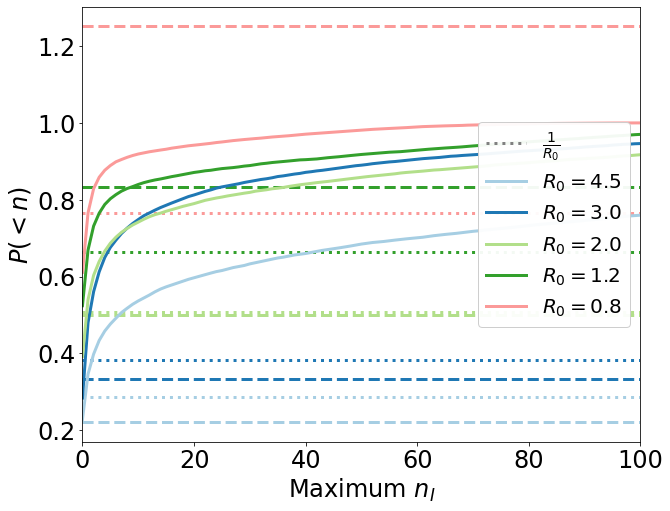

In [5]:
lines_symbols = [Line2D([0], [0], color='grey', linewidth=3, linestyle='dotted', ms = 8)]
labels_symbols = [r'$\frac{1}{R_0}$']


fig, ax = plt.subplots(figsize = (10,8))
p=0.0
sigma=1000
gamma = 1/6
if(p==0.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2, 0.8])
if(p==1.0):
    R0s = np.array([4.5, 3.0, 2.0, 1.2])    
for i, R0 in enumerate(R0s):
    data_I = np.loadtxt(Text_files_path+'Stochastic/Networks/barabasi-albert/ensemble_I_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(R0, sigma, N, p))
    data_E = np.loadtxt(Text_files_path+'Stochastic/Networks/barabasi-albert/ensemble_E_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(R0, sigma, N, p))
    data_nodes = np.loadtxt('../../../../Dropbox/Research/Epidemiology_2020/Text_files/Stochastic/Networks/barabasi-albert/stats_R0%.1f_sigma%.1f_N%d_p%.1f_barabasi-albert.txt'%(R0, sigma, N, p))
    nodes_ext , nodes_succ, I_ext, I_succ, max_values, data_ext = sort_nodes(p=p, beta=R0*gamma, sigma=sigma, gamma=gamma, data_I = data_I, data_E = data_E, data_nodes = data_nodes, upper_limit = 2)
    n_ext = len(nodes_ext[:,0])
    print(n_ext)
    prob_ext = n_ext/len(data_nodes[:,0])
    data_hist = numpy.histogram(max_values, bins = range(0,int(max(max_values))+2, 1), density =True);
    ax.plot(data_hist[1][:-1], np.cumsum(data_hist[0]), '-', color = colors_R[i], linewidth = 3, label = r'$R_0=$%.1f'%(R0))
    #ax.plot(data_hist[1][:-1], data_hist[0], '-', color = color_Rs[i], linewidth = 3, alpha = 0.3)
    ax.hlines(1/(R0), 0,int(max(max_values))+2, color = colors_R[i], linewidth=3, linestyle='dashed' )
    ax.hlines(prob_ext, 0,int(max(max_values))+2, color = colors_R[i], linewidth=3, linestyle='dotted' )

my_plot_layout(ax = ax, xlabel=r'Maximum $n_{{I}}$', ylabel=r'$P(<n)$')
ax.set_xlim(0, 100)
#ax.set_ylim(0, 10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(np.concatenate((lines_symbols,handles)), np.concatenate((labels_symbols,labels)) , fontsize = 20, loc = 5, framealpha=.95)
#fig.savefig('../Figures/Stochastic/Networks/barabasi-albert/maximum_ni_1_sigma_%.2f_p%.1f.pdf'%(sigma,p))


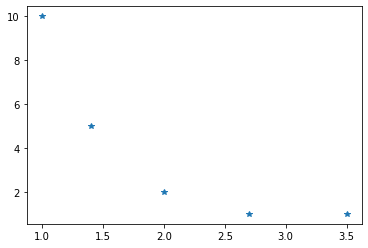

In [202]:
plt.plot(R0_array, n50+1, '*')

In [205]:
n50 = np.array([10,  5,  2,  1,  1])
n50 = np.tile(n50, (5,1))

In [206]:
n50

array([[10,  5,  2,  1,  1],
       [10,  5,  2,  1,  1],
       [10,  5,  2,  1,  1],
       [10,  5,  2,  1,  1],
       [10,  5,  2,  1,  1]])

In [211]:
R0_array = np.array([1.1, 1.4, 1.7, 2.1])
ns = np.arange(25)
n50 = np.array([ns[(1-(1/R0_array[i])**(2*ns))<0.5][-1] for i in np.arange(len(R0_array))])
n50+1

array([4, 2, 1, 1])

In [221]:
sample_sizes = np.array([int((N/100)*1.875), int((N/100)*3.125), int((N/100)*5.0)])
np.tile(sample_sizes, 3)

array([ 37,  62, 100,  37,  62, 100,  37,  62, 100])

In [265]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter
[FormatStrFormatter('%.1f').format_ticks(np.array([sample_sizes[i]])/N*100)[0] + '%' for i in np.arange(3)]

['1.8%', '3.1%', '5.0%']

<AxesSubplot:>

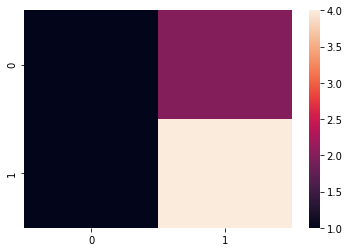

In [266]:
sns.heatmap([[1,2],[1,4]])

6.0 4.800000000000001


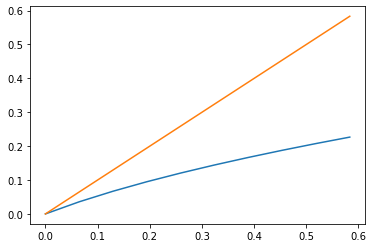

In [26]:
sigma = 1/4
gamma = 1/6
betas = np.linspace(gamma, 0.75, 10)
tau_SIR = 1/gamma
tau_SEIR = 2*(gamma + sigma)**(-1)
print(tau_SIR, tau_SEIR)
plt.plot((betas/gamma-1)/tau_SIR, (np.sqrt(1-4*((sigma*gamma-sigma*betas)/(sigma+gamma)**2))-1)/tau_SEIR)
plt.plot((betas/gamma-1)/tau_SIR, (betas/gamma-1)/tau_SIR)

In [28]:
np.reshape([1, 2, 3, 4, 5, 6], (2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
R0s = [1,2, 3]
np.arange(1,len(R0s)*2 +1, 2)

array([1, 3, 5])